# Solving Ordinary Differential Equations Numerically with Python

Ordinary differential equations are equations where the unknown is a function and the equations involve the derivatives of that unknown function with respect to a single independent variable.

Here we'll denote the unknown function by $y$, and the independent variable by $t$ (since we often think of this variable as time).

For example, you may have seen something like the following differential equation:
$$
\frac{dy}{dt}=2y
$$
You can check that, for any constant $C$, the function:
$$
y(t)=Ce^{2t}
$$
is a solution.

You can verify this by taking derivatives and checking that the equation holds:
$$
\frac{d}{dt}y(t)=\frac{d}{dt}\left(Ce^{2t}\right)=2Ce^{2t}=2y(t)
$$

By imposing an initial condition at time $t=0$, we can specify a particular solution. For example, if we require $y(0)=5$, we see that:
$$
5=y(0)=2Ce^{2(0)}=2C
$$
and hence $C=5/2$. Thus, we obtain the particular, solution:
$$
y(t)=2(5/2)e^{2t}=5e^{2t}.
$$

First, we will focus on first order differential equations of the form:
$$
y'=f(t,y)
$$
So in the above example, $f(t,y)=2y$.

Notice that a solution $y(t)$ is then a function such that:
$$
y'(t)=f\big(t,y(t)\big)
$$
is a true equation.

When we impose an initial condition we often call the pair of an equation and initial condition as an *initial value problem* and write:
$$
\begin{cases}
y'=f(t,y) \\
y(0)=y_0
\end{cases}
$$
where $y_0$ is some initial value.

Most ordinary differential equations, don't have explicit solutions. Nevertheless, solutions are guaranteed to exist for most such equations. Therefore, it is of interest to solve these numerically to use these in applications, understand their qualitative behavior, and conjecture statements that can later be rigorously proven.

Below you will implement some of the basic algorithms to solve ordinary differential equations.

Some more sophisticated methods have been developed, and these can be found in Scipy. Thus, you'll also learn how to use these built-in methods and how to choose between them.

## Euler Method

Given a differential equation of the form $y'=f(t,y)$, most methods of solution begin by partitioning an interval of interest, say $[0,1]$ into pieces:
$$
0=t_0<t_1<...<t_n=1
$$

The end-product of the algorithm will be a list of values:
$$
y_0:=y(t_0)\,,\,y_1:=y(t_1)\,,\,...\,,\,y_n:=y(t_n)
$$
approximating the solution at those partition points.

One of the simplest methods, is the *Euler method*. Intuitively, you can think of this method as approximating the solution by following the linear approximation's graph at each point starting from the initial condition.

The idea is to approximate the derivative using the forward difference:
$$
f(t_n,y_n)\approx\frac{y_{n+1}-y_{n}}{t_{n+1}-t_n}
$$
which provides the following scheme:
$$
y_{n+1}=y_n+f(t_n,y_n)(t_{n+1}-t_n)
$$

To simplify things, one can consider the case when the distance between the time steps is a constant $h$ (more sophisticated methods vary the step size as the algorithm proceeds). In such a case, the above scheme becomes:
$$
y_{n+1}=y_n+f(t_n,y_n)h
$$

The Euler method consists of computing $y_{n+1}$ using the above scheme, starting from the initial condition $y_0$.

#### Exercise

Write a function implementing the Euler method, taking as arguments the function $f(t,y)$ and an initial condition.

#### Exercise

Test the Euler Method on the following functions, with the specified step size $h$:
1. $y'=3+t-y\qquad\qquad y(0)=1 \qquad\qquad 0\le t \le 1 \qquad\qquad h=0.05,\, 0.025$
1. $y'=2t+e^{-ty}\qquad\qquad y(0)=1 \qquad\qquad 0\le t \le 1 \qquad\qquad h=0.05,\, 0.025$

Plot the approximate solutions.

#### Exercise

Plot your solution for the problem:
$$
y'=1-t+4y
\qquad\qquad
y(0)=1
\qquad\qquad
0\le t \le 1
\qquad\qquad
h=0.05,\,0.025,\,0.01
$$
together with the exact solution:
$$
y(t)=\frac{1}{4}t-\frac{3}{16}+\frac{19}{16}e^{4t}
$$

Make another plot of the error at each time step as compared with the exact solution.

#### Exercise

A slight variation of the Euler method involves using backwards differences to obtain the implicit scheme:
$$
y_{n+1}-y_n=hf(t_{n+1},y_{n+1})
$$
Note that this doesn't give $y_{n+1}$ explicitly in terms of data already known. Hence, this equation must be solved for $y_{n+1}$ before being implemented.

Implement this scheme as a Python function that takes initial conditions as arguments for the differential equation:

Begin by solving $y_{n+1}-y_n=hf(t_{n+1},y_{n+1})$ by hand.

Implement this scheme as a Python function that takes initial conditions and the function $f(t,y)$ as arguments. At each step of the iteration, you will need to use a solver from the *Day 2 solving equations* notes, within your function to solve the equation $y_{n+1}-y_n=hf(t_{n+1},y_{n+1})$ for $y_{n+1}$ using the values of $y_{n}$ and $t_{n+1}$.

Compare this implementation by testing it on the result you got for the previous exercise.

## Improved Euler Method

The Improved Euler Method or Heun's method consists of another step in the iterations used in the Euler Method. Instead of defining $y_{n+1}$ by the formula:
$$
y_{n+1}=y_n+hf(t_n,y_n)
$$
we use two steps:

1. Compute $z_{n+1}=y_n+hf(t_n,y_n)$
2. Compute $y_{n+1}=y_n+\frac{h}{2} \Big(f(t_n,y_n)+f(t_n+h,z_{n+1})\Big)$

#### Exercise

Write a function implementing the Improved Euler Method taking initial conditions and the function $f(t,y)$ as arguments.

#### Exercise

Test your code for the Improved Euler Method against the equations:
1. $y'=3+t-y\qquad\qquad y(0)=1 \qquad\qquad 0\le t \le 1 \qquad\qquad h=0.05,\, 0.025$
1. $y'=2t+e^{-ty}\qquad\qquad y(0)=1 \qquad\qquad 0\le t \le 1 \qquad\qquad h=0.05,\, 0.025$

Plot your results against the Euler Method.

#### Exercise 

Consider the differential equation Plot your solution for the problem:
$$
y'=1-t+4y
\qquad\qquad
y(0)=1
\qquad\qquad
0\le t \le 1
\qquad\qquad
h=0.05,\,0.025,\,0.01
$$
which has the exact solution:
$$
y(t)=\frac{1}{4}t-\frac{3}{16}+\frac{19}{16}e^{4t}
$$

Plot the solution for this problem obtained from your Improved Euler Method code together with the exact solution.

Compute and plot the error in the numerical computation. Compare with the regular Euler method.

## Runge-Kutta

All of the above schemes are considered part of the Runga-Kuta class of methods, but there's one method in particular that is called *the* Runga-Kutta method. 

The method consists of performing the following computations at each step:
$$
\begin{align}
z_{n1}&=f(t_n,y_n) \\
z_{n2}&=f\left(t_n+\frac{h}{2},y_n+\frac{h}{2}z_{n1}\right)\\
z_{n3}&=f\left(t_n+\frac{h}{2},y_n+\frac{h}{2}z_{n2}\right)\\
z_{n4}&=f\left(t_n+h,y_n+hz_{n3}\right)\\
y_{n+1}&=y_n+\frac{h}{6}\Big(z_{n1}+2z_{n2}+2z_{n3}+z_{n4}\Big)
\end{align}
$$

#### Exercise

Write a function implementing the Runge-Kutta method that takes as argument the initial condition and the function $f(t,y)$.

#### Exercise

Test your code for the Runge-Kutta Method against the equations:
1. $y'=3+t-y\qquad\qquad y(0)=1 \qquad\qquad 0\le t \le 1 \qquad\qquad h=0.1,\,0.05,\, 0.025$
1. $y'=2t+e^{-ty}\qquad\qquad y(0)=1 \qquad\qquad 0\le t \le 1 \qquad\qquad h=0.1,\,0.05,\, 0.025$

Plot your results against the Euler Method and the Improved Euler Method.

## Scipy's Solvers

Scipy built-in integrators to numerically approximate the solutions of an initial value problem.

In the methods discussed above, the step size $h$ was fixed. However, based on estimates for the numerical errors in these schemes, the step size can be varied dynamically as the algorithm steps through the interval partition. A detailed description of this is beyond the scope of this workshop. That being said, it is important to keep in mind that many of the built-in solvers in Scipy have this implemented by default.

Another feature the methods discussed before have in common, is that at the $n^{th}$ step all these methods use only the data from the $(n-1)^{th}$ step. Thus, they are called *single-step methods*. Most built-in solvers default to the [**Adams method**](https://en.wikipedia.org/wiki/Linear_multistep_method#Adams.E2.80.93Bashforth_methods) or the [**backwards differentiation method**](https://en.wikipedia.org/wiki/Backward_differentiation_formula), which are multi-step methods meaning they use more data than just the data of the previous step.

We will only discuss the <mark>odeint</mark> integrator in the scipy.integrate library, but there is another option in the scipy.integrate library called <mark>ode</mark> with a few more options.

For this, we will need to import the following:

In [1]:
import numpy as np
import scipy.integrate as spi

To plot solutions let's import the following:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The odeint solver

The scipy.integrate function <mark>odeint</mark> solves an ODE of the form:
$$
y'=f(t,y)
$$
over a given interval. The first argument is the function $f(t,y)$, the second argument is the initial condition, the third argument is the interval.

Here is an example solving the initial value problem:
$$
\begin{cases}
y'=3-2t-0.5y\\
y(0)=1
\end{cases}
$$
over the interval $[0,1]$.

In [3]:
equation = lambda y, t : 3.-2.*t-0.5*y

I = np.linspace(0,1,1000)

sol = spi.odeint(equation,[1],I)

print sol[0:5] #print the first few entries of sol so to see format

[[ 1.        ]
 [ 1.00250087]
 [ 1.00499849]
 [ 1.00749286]
 [ 1.00998398]]


In [4]:
sol[0]

array([ 1.])

The initial value problem has the exact solution:
$$
y(t)=14-4t-13\exp(-t/2)
$$
Let's plot the numerical solution against this solution.

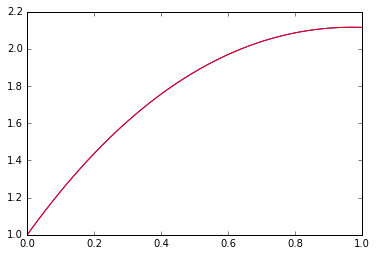

In [5]:
plt.figure()
plt.plot(I,sol,color='b')
plt.plot(I,14.-4.*I-13.*np.exp(-I/2.),color='r')
plt.show()

The solution and its approximation are almost indistinguishable graphically, but there is an error.

This error is fine for many purposes, but proper adjustments can reduce it to a more tolerable level.

The <mark>odeint</mark> solver automatically selects between the [**Adams method**](https://en.wikipedia.org/wiki/Linear_multistep_method#Adams.E2.80.93Bashforth_methods) and the [**backwards differentiation method**](https://en.wikipedia.org/wiki/Backward_differentiation_formula) mentioned before. One of the main considerations it takes is dealing with the issue of [**stiffness**](https://en.wikipedia.org/wiki/Stiff_equation) in a differential equation.

The scipy.integrate solver <mark>ode</mark> is another solver in Scipy, which has several numerical schemes to choose from.

The syntax is a little bit different to <mark>odeint</mark>.

Here the first argument is the function and the second (optional) argument is the Jacobian of the function.

One uses the method <mark>set_integrator</mark> to choose between the available integrators. The different integrators are:
* vode : Adams and BDF methods
* zvode : Adams and BDF methods with complex variable support
* lsoda : Adams and BDF methods (same as odeint)
* dopri5 : Runge-Kutta of order (4)5
* dop853 : Runge-Kutta of order 8(5,3)

The order of the Runge-Kutta schemes corresponds to the order of the error in terms of the step size and the stages of computation between steps.

For more on this integrator see [**here**](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.ode.html#hnw93). This one is a bit trickier to use.

## Systems of First Order Equations

All of the above methods apply to systems of first order differential equations of the form:
$$
\begin{cases}
y_1'=f_1(t,y_1,...,y_n) \\
y_2'=f_2(t,y_1,...,y_n) \\
... \\
y_n'=f_n(t,y_1,...,y_n)
\end{cases}
$$

which we can write as:
$$
y'=F(t,y)
$$
where $y=(y_1,...,y_n)$ and $F(t,y)=\big(f_1(t,y),...,f_n(t,y)\big)$.

An initial value problem is then of the form:
$$
\begin{cases}
y'=F(t,y) \\
y(0)=y_0
\end{cases}
$$
where $y_0$ is a given vector thought of as an initial condition.

The methods discussed thus far all apply to systems of differential equations by applying them component-wise.

#### Exercise

Modify your code for the Euler Method and Runge-Kutta Method to work with systems of first order equations.

Test these with the following system of equations: 
$$x'=x+y-t\qquad\qquad y'=4x-2y\qquad\qquad (x(0),y(0))=(1,0)$$

where you compare Euler method with $h=0.05$ and Runge-Kutta with $h=0.2$.

#### Exercise

For a sysem of first order differential equations of the form $z'=F(z)$, where $z=(z_1,...,z_n)$, we can think of the right hand side as a vector field on $\mathbb{R}^n$.

The solution to the initial value problem:
$$
\begin{cases}
z'=F(z) \\
z(0)=z_0
\end{cases}
$$
where $z_0$ is some given point in $\mathbb{R}^n$ is a curve $z(t)$ starting at the point $z_0$. At each point on the curve, its velocity is given by the vector field at that point. We call such a solution an integral curve when we think of it in this manner.

Consider the system in $\mathbb{R}^2$ given by 
$$
\begin{cases}
x'=y\\
y'=x-x^3
\end{cases}
$$
Here the vector field is $F(x,y)=(y,x-x^3)$.

A fixed point of this system is a pair $(x_p,y_p)\in\mathbb{R}^2$ such that $F(x_p,y_p)=(0,0)$.

1. Mathematically solve for the fixed points by simulatenously solving the equations:
$$
\begin{cases}
y=0\\
x-x^3=0
\end{cases}
$$
2. Solve the system numerically for any given initial condition and verify that the function:
$
E(x,y)=\frac{y^2}{2}-\frac{x^2}{2}+\frac{x^4}{4}
$
is constant along these curves. That is, if $(x(t),y(t))$ is a solution, check and plot the values $E(x(t),y(t))$ on your solution.
2. Plot the vector field $F(x,y)$, by following the plotting notes from Day 1, in such a way that the fixed points are in your view window.
3. Plot several integral curves by solving the system numerically for differential initial conditions. The curves should close up. You want to capture integral curves around each fixed point, so pick initial conditions near each. What you are plotting here is what's often referred to as a *phase portrait* of the system.
4. Roughly speaking, a fixed point is stable if nearby integral curves stay nearby. Roughly speaking, it is unstable if there are always nearby integral curves that don't stay near it. Using your picture, can you conjecture whether each of the system's fixed points are stable or unstable?
5. In this example, the trajectories are also obtained by looking at the level curves of the function:
$$
E(x,y)=\frac{y^2}{2}-\frac{x^2}{2}+\frac{x^4}{4}
$$
On a separate plot, plot the level curves of this function by using the contour plotting tools from Day 1.

NOTE: There are fancier ways of building the phase portraits instead of plotting a bunch of integral curves. For example, by using [**this**](https://matplotlib.org/devdocs/gallery/images_contours_and_fields/plot_streamplot.html). However, this exercise gives you practice using these tools and helps you appreciate what's going on "under the hood" when we solve systems of ordinary differential equations and interpret them this way.

#### Exercise

Consider the system of equations:
$$
\begin{cases}
x'=\mu x -x^3 \\
y'=-y
\end{cases}
$$
where $\mu$ is a real number that you should think of as a parameter. That is, fixing a value of $\mu$ you obtain a system of first-order differential equations on $\mathbb{R}^2$. Equivalently, for every $\mu$, there's a vector field on $\mathbb{R}^2$ by thinking of the right hand side as a function. The vector field is:
$$
F_\mu(x,y)=\Big(\mu x-x^3,-y\Big)
$$

As we vary the parameter $\mu$ from negative to positive numbers, the phase portrait changes topologically. That is, the number of fixed points varies and the behavior of the integral curves changes. This is called a bifurcation, and this particular instance of it is called a *pitchfork bifurcation*.

1. Mathematically solve for the fixed points of $F_\mu(x,y)$ in terms of $\mu$. 
1. Create a function, taking as argument the parameter $\mu$, that plots the phase portrait around the fixed points.
1. Using the function create a family of subplots showing the bifurcation occur. That is, for example, plot the phase portraits for several values of $\mu$ varying from $-1$ to $1$.

NOTE: There are fancier ways of building the phase portraits instead of plotting a bunch of integral curves. For example, by using [**this**](https://matplotlib.org/devdocs/gallery/images_contours_and_fields/plot_streamplot.html). However, this exercise gives you practice using these tools and helps you appreciate what's going on "under the hood" when we solve systems of ordinary differential equations and interpret them this way.